# Optimización de la producción de proteínas recombinantes mediante Pichia pastoris en un cultivo por lote alimentado a partir de un modelo matemático.

### Estudio de Caso 1.  A partir de los datos publicados en el artículo de Barrigon et al (2015)

Revisitado

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gekko import GEKKO

m=GEKKO()
#nt=51 ##fijo 
nt=101
#nt=201  
m.time=np.linspace(0,1,nt)

#Variables
x=m.Var(value=28.385,lb=0,ub=200) # densidad de biomasa
s=m.Var(value=1.2439,lb=0,ub=20) #densidad de Metanol
r=m.Var(value=72,lb=0) #densidad de proteína 
v=m.Var(value=2,lb=0,ub=12) #volumen
#mu=m.Var(value=0,lb=0) #mu
#mup=m.Var(value=0,lb=0) #mup
##c=m.Var(value=1,lb=0) #oxígeno disuelto

p=np.zeros(nt) #vector nulo de longitud nt
p[-1]=1.0 # reemplazamos la última coodirnada de p por 1
final=m.Param(value=p)
#FV
tf=m.FV(value=1.0,lb=20,ub=80)
tf.STATUS=1
#Parametros
u=m.MV(lb=0,ub=1) 
u.STATUS=1
u.DCOST=0
m.free_initial(u)


#@markdown ####*Parametros básicos a ajustar:*
#Velocidad específica máxima de crecimiento 
MuM = 0.069
#Constante de sustrato 
KM = 0.4
#Constante de inhibición (g/L)
KI = 8.85
#Rendimiento sustrato (g/g)
YM = 4.21
#Concentración de Sustrato que ingresa (g/L) - 792 g/L es metanol puro
MF = 792
# Coeficiente de mantención
Mm = 0.0142
# Constante beta en el modelo de L-Piret
bet = 39.3
# Constante alfa en el modelo de L-Piret
alf = 4567


##kla= 360  # Barrigon et al. 2012  
##C= 0.00066  # Barrigon et al. 2012
#C= 0.008  # Diego
##YO2= 0.169  # Barrigon et al. 2012

#DEfinición qp a tramos

qp = m.if2(s-1.9, bet,bet+alf*(MuM*s/(KM+s+(s**2)/KI)))


#Ecuaciones
m.Equation(x.dt()==((MuM*s/(KM+s+(s**2)/KI)*x-(u*x)/v)*tf))#((MuM*s/(KM+s+(s**2)/KI))*x-(u*x)/v)*tf) #biomasa
m.Equation(s.dt()==(u*(MF-s)/v-(Mm+(1/YM)*(MuM*s/(KM+s+(s**2)/KI)))*x)*tf) #sustrato
m.Equation(r.dt()==(x*qp-(u*r)/v)*tf) #proteina
##m.Equation(c.dt()==( -c*u/v + kla*(C-c)-(1/YO2)*(MuM*s/(KM+s+(s**2)/KI))*x )*tf) #oxigeno disuelto
m.Equation(v.dt()==u*tf)



#Función Objetivo
m.Obj(-((r*v)*final)/tf)
#Solver
m.options.IMODE=6   # Control Optimo Método Simultaneo
m.options.NODES=4   # Nodos de colocación
m.options.MV_TYPE=1
m.options.MAX_ITER=3000
#m.options.SOLVER=3


m.solve(disp=True)
print('Tiempo final:'+str(tf.value[0]))
print('Densidad de Proteina final:'+str((r.value[-1])))
print('Proteina final:'+str((r.value[-1])*v.value[-1]))
print('Productividad de proteina:'+str(r.value[-1]*v.value[-1]/tf.value[0]))
print('Densidad de Biomasa final:'+str((x.value[-1])))
print('Biomasa final:'+str((x.value[-1])*v.value[-1]))
 

#Transformación de unidades

X=np.multiply(v,x)

S=np.multiply(v,s)

R=np.multiply(v,r)

#DX=np.multiply(X,mu)

#DR=np.multiply(X,mup)

tm=m.time*tf.value[0]


#Construcción de graficos

plt.step(tm, u, where='pre', label='u',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Feed rate ( $L\, h^{-1}$ )')
plt.savefig('FigA.eps', format='eps')
plt.show()

#########################################

fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('Time ( $h$ )')
ax1.set_ylabel('Feed rate  ( $L\, h^{-1}$ )', color=color)
ax1.step(tm, u, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Volume ( $L$ )', color=color)  # we already handled the x-label with ax1
ax2.plot(tm, v, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('FigB.eps', format='eps')
plt.show()

##########################################################


fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('Time ( $h$ )')
ax1.set_ylabel('Biomass ( $g\, L^{-1}$ )', color=color)
ax1.plot(tm, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:grey'
ax2.set_ylabel('Methanol ( $g\, L^{-1}$ )', color=color)  # we already handled the x-label with ax1
ax2.plot(tm, s,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('FigC.eps', format='eps')
plt.show()

##########################################

plt.plot(tm, r, label='p',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Protein ( $U\, L^{-1}$ )')
plt.savefig('FigD.eps', format='eps')
plt.show()


plt.plot(tm, R, label='p',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Protein ( $U $ )')
plt.savefig('FigE.eps', format='eps')
plt.show()


plt.plot(tm, X, label='x',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Biomass ( $g $ )')
plt.savefig('FigF.eps', format='eps')
plt.show()

#plt.plot(tm, c, label='x',color='k')
#plt.legend(loc='best')
#plt.xlabel('Time ( $h$ )')
#plt.ylabel('Dissolved oxygen ( $g \, L^{-1} $ )')
#plt.savefig('FigG.eps', format='eps')
#plt.show()

print(u.value)

print(tm)


# Comparación con datos de la Figura 4 directamente

In [9]:

import numpy as np
import pandas as pd
from gekko import GEKKO
import matplotlib.pyplot as plt

from scipy import interpolate

Biomasa = pd.DataFrame({'Biomass':X})

Proteina = pd.DataFrame({'Protein':R})

Tiempo = pd.DataFrame({'Time':tm})

Tabla=pd.concat([Tiempo,Biomasa,Proteina],axis=1)

Tabla


biomasa = pd.DataFrame({'Biomass':x.value})

sustrato = pd.DataFrame({'Substrate':s.value})

proteina = pd.DataFrame({'Protein':r.value})

flujo = pd.DataFrame({'Flux':u.value})

volume = pd.DataFrame({'Volume':v.value})


tabla=pd.concat([Tiempo,biomasa,sustrato,proteina,flujo,volume],axis=1)

tabla





#Tabla.to_csv('Tabla.csv')

# creating excel writer object
 
writer1 = pd.ExcelWriter('converted-to-excel1.xlsx')

# write dataframe to excel
 
Tabla.to_excel(writer1)
 
# save the excel
writer1.save()
print("DataFrame is exported successfully to 'converted-to-excel1.xlsx' Excel File.")


writer2 = pd.ExcelWriter('converted-to-excel2.xlsx')

tabla.to_excel(writer2)
 
# save the excel
writer2.save()
print("DataFrame is exported successfully to 'converted-to-excel2.xlsx' Excel File.")



DataFrame is exported successfully to 'converted-to-excel1.xlsx' Excel File.
DataFrame is exported successfully to 'converted-to-excel2.xlsx' Excel File.


C:\Users\danie\AppData\Local\Temp\ipykernel_8156\588846039.py:49: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer1.save()
C:\Users\danie\AppData\Local\Temp\ipykernel_8156\588846039.py:58: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer2.save()


# Comparación con datos de la Figura 4 via csv

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


   time01        CM01  time3         CM3  time5         CM5  time8  \
0     0.0    0.000000    0.0    0.000000    0.0    0.000000    0.0   
1     3.5   16.633663    3.0    9.108911    1.0    1.188119    1.5   
2     6.0   24.158416    6.5   19.009901    5.5   14.653465    4.5   
3    10.0   40.000000   10.5   30.099010   12.0   35.247525   16.5   
4    14.0   54.653465   15.0   50.693069   18.5   60.594059   21.5   
5    18.0   70.891089   17.0   62.178218   21.0   75.247525   23.0   
6    21.5   83.168317   22.0   97.425743   24.5   95.445545    0.0   
7    25.0  115.643564   24.0  114.455446   27.0  114.059406    0.0   
8     0.0    0.000000    0.0    0.000000    0.0    0.000000    0.0   

          CM8  time10       CM10   Predtime        PRED  
0    0.000000     0.0   0.000000   0.000000    0.000000  
1    7.920792     2.0   4.356436   3.073913    9.092831  
2   19.801980     6.0   6.336634   6.147826   19.661419  
3   71.683168    12.0  20.990099   9.221739   31.925881  
4   93.46

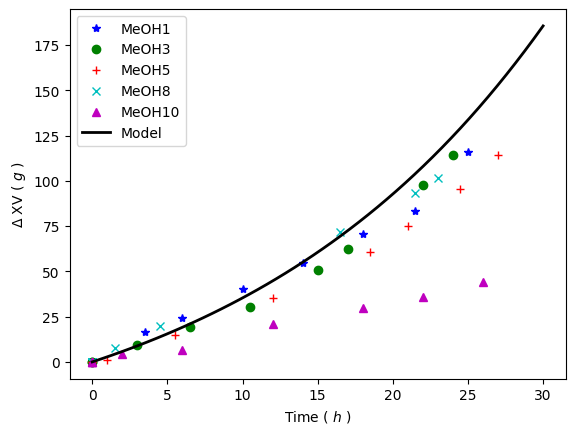

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


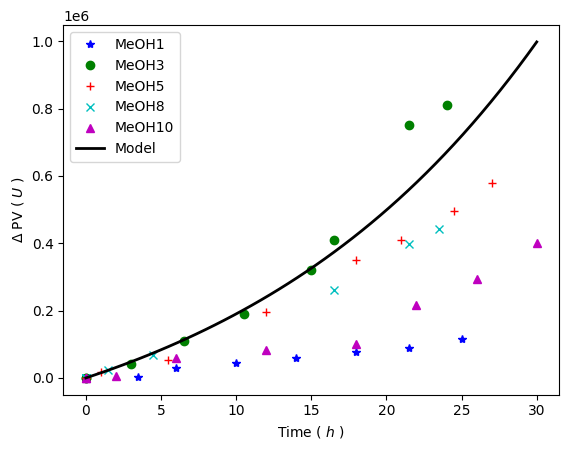

In [20]:
import numpy as np
import pandas as pd
from gekko import GEKKO
import matplotlib.pyplot as plt

from scipy import interpolate

df1=pd.read_csv('Fig4A Barrigon2015.csv') 
print(df1)
df2=pd.read_csv('Fig4B Barrigon2015.csv') 
print(df2)


tm01 = df1['time01'].values
M1 = df1['CM01'].values
tm3 = df1['time3'].values
M3 = df1['CM3'].values
tm5 = df1['time5'].values
M5 = df1['CM5'].values
tm8 = df1['time8'].values
M8 = df1['CM8'].values
tm10 = df1['time10'].values
M10 = df1['CM10'].values
tmpred = df1['Predtime'].values
Mpred = df1['PRED'].values

Ptm01 = df2['Ptime01'].values
PM1 = df2['PCM01'].values
Ptm3 = df2['Ptime3'].values
PM3 = df2['PCM3'].values
Ptm5 = df2['Ptime5'].values
PM5 = df2['PCM5'].values
Ptm8 = df2['Ptime8'].values
PM8 = df2['PCM8'].values
Ptm10 = df2['Ptime10'].values
PM10 = df2['PCM10'].values
Ptmpred = df2['Predtime'].values
PMpred = df2['Pred'].values

#Interpolacion
T = df1['Predtime'].values
XM = df1['PRED'].values
PM = df2['Pred'].values

def xe(x):
    x_points = T
    y_points = XM

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def re(x):
    x_points = T
    y_points = PM

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

 

#Transformación de unidades


t=np.linspace(0,30)

xi=xe(t)

ri=re(t)

#Construcción de graficos


#plt.plot(tm, DX, label='$\Delta$ XV',color='k')

plt.plot(tm01,M1,'b*',lw=2,label='MeOH1')
plt.plot(tm3,M3,'go',lw=2,label='MeOH3')
plt.plot(tm5,M5,'r+',lw=2,label='MeOH5')
plt.plot(tm8,M8,'cx',lw=2,label='MeOH8')
plt.plot(tm10,M10,'m^',lw=2,label='MeOH10')
plt.plot(t,xi,'k',lw=2,label='Model')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('$\Delta$ XV ( $g $ )')
plt.savefig('Fig4A.eps', format='eps')
plt.show()

#plt.plot(tm, DR, label='$\Delta$ PV',color='k')
#plt.legend(loc='best')
plt.plot(Ptm01,PM1,'b*',lw=2,label='MeOH1')
plt.plot(Ptm3,PM3,'go',lw=2,label='MeOH3')
plt.plot(Ptm5,PM5,'r+',lw=2,label='MeOH5')
plt.plot(Ptm8,PM8,'cx',lw=2,label='MeOH8')
plt.plot(Ptm10,PM10,'m^',lw=2,label='MeOH10')
plt.plot(t,ri,'k',lw=2,label='Model')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('$\Delta$ PV ( $U $ )')
plt.savefig('Fig4B.eps', format='eps')
plt.show()

## Buscando un perfil del oxígeno disuelto

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


     Unnamed: 0       Time     Biomass  Substrate        Protein      Flux  \
0             0   0.000000   28.385000   1.243900      72.000000  0.010306   
1             1   0.439089   28.956096   1.935649    1483.868749  0.001396   
2             2   0.878177   29.567194   1.900000    4828.321871  0.002005   
3             3   1.317266   30.189452   1.903099    8241.691389  0.001925   
4             4   1.756355   30.824774   1.900000   11725.470526  0.002017   
..          ...        ...         ...        ...            ...       ...   
96           96  42.152515  193.491170   2.215727  903928.866650  0.019092   
97           97  42.591604  197.156185   1.900000  923985.160800  0.005453   
98           98  43.030692  199.724892   5.575027  938953.678920  0.071703   
99           99  43.469781  200.000000  13.759316  943294.273280  0.063389   
100         100  43.908870  200.000000  20.000000  946422.444190  0.045446   

       Volume  Unnamed: 7  Unnamed: 8        mu  Unnamed: 10   

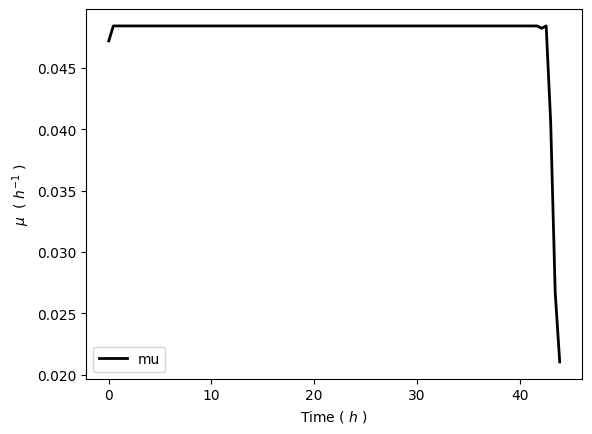

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


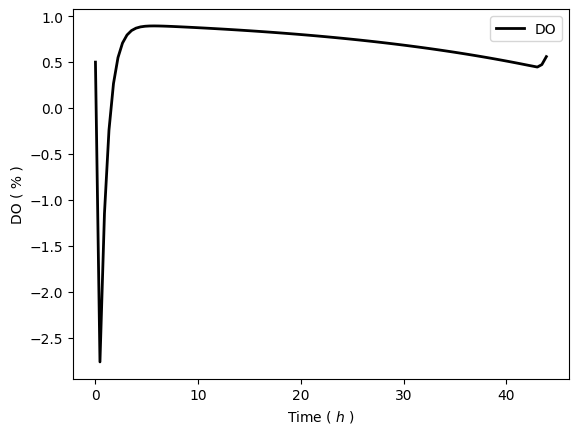

In [16]:
import numpy as np
import pandas as pd
from gekko import GEKKO
import matplotlib.pyplot as plt

from scipy import interpolate

df1 = pd.read_excel('Mu-DO.xlsx', sheet_name='Sheet1')

# print whole sheet data
print(df1)



tm01 = df1['Time'].values
r = df1['Protein'].values
Mu = df1['mu'].values

#Construcción de graficos


fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('Time ( $h$ )')
ax1.set_ylabel('Protein  ( $U\, L^{-1}$ )', color=color)
ax1.step(tm01,r, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('$\mu$ ( $h^{-1}$ )', color=color)  # we already handled the x-label with ax1
ax2.plot(tm01, Mu, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('FigMu.eps', format='eps')
plt.show()







# Optimización de la producción de proteínas recombinantes mediante Pichia pastoris considerando oxígeno disuelto

Revisitado

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gekko import GEKKO

m=GEKKO()
nt=51 ##fijo 
#nt=101
#nt=201  
m.time=np.linspace(0,1,nt)

#Variables
x=m.Var(value=28.385,lb=0,ub=200) # densidad de biomasa
s=m.Var(value=1.2439,lb=0,ub=20) #densidad de Metanol
r=m.Var(value=72,lb=0) #densidad de proteína 
v=m.Var(value=2,lb=0,ub=12) #volumen
mu=m.Var(value=0,lb=0) #mu
mup=m.Var(value=0,lb=0) #mup
c=m.Var(value=0.000132,lb=0.000048) #oxígeno disuelto
k=m.Var(value=360,lb=0,ub=500) #kLa

p=np.zeros(nt) #vector nulo de longitud nt
p[-1]=1.0 # reemplazamos la última coodirnada de p por 1
final=m.Param(value=p)
#FV
tf=m.FV(value=1.0,lb=20,ub=80)
tf.STATUS=1
#Parametros
u=m.MV(lb=0,ub=1) 
u.STATUS=1
u.DCOST=0
m.free_initial(u)
#k=m.MV(lb=0,ub=500) 
#u.STATUS=1
#u.DCOST=0
#m.free_initial(k)


#@markdown ####*Parametros básicos a ajustar:*
#Velocidad específica máxima de crecimiento 
MuM = 0.069
#Constante de sustrato 
KM = 0.4
#Constante de inhibición (g/L)
KI = 8.85
#Rendimiento sustrato (g/g)
YM = 4.21
#Concentración de Sustrato que ingresa (g/L) - 792 g/L es metanol puro
MF = 792
# Coeficiente de mantención
Mm = 0.0142
# Constante beta en el modelo de L-Piret
bet = 39.3
# Constante alfa en el modelo de L-Piret
alf = 4567


kla= 360  # Barrigon et al. 2012  
C= 0.00066  # Barrigon et al. 2012
#C= 0.008  # Diego
YO2= 0.169  # Barrigon et al. 2012

#DEfinición qp a tramos

qp = m.if2(s-1.9, bet,bet+alf*(MuM*s/(KM+s+(s**2)/KI)))


#Ecuaciones
m.Equation(x.dt()==((MuM*s/(KM+s+(s**2)/KI)*x-(u*x)/v)*tf))#((MuM*s/(KM+s+(s**2)/KI))*x-(u*x)/v)*tf) #biomasa
m.Equation(s.dt()==(u*(MF-s)/v-(Mm+(1/YM)*(MuM*s/(KM+s+(s**2)/KI)))*x)*tf) #sustrato
m.Equation(r.dt()==(x*qp-(u*r)/v)*tf) #proteina
m.Equation(c.dt()==(-(u*c)/v+ k*(C-c)-(1/YO2)*(MuM*s/(KM+s+(s**2)/KI))*x )*tf) #oxigeno disuelto
m.Equation(v.dt()==u*tf)
m.Equation(k=((MuM*s/(KM+s+(s**2)/KI))*x)/(YO2*(C-c)))



#Función Objetivo
m.Obj(-((r*v)*final)/tf)
#Solver
m.options.IMODE=6   # Control Optimo Método Simultaneo
m.options.NODES=4   # Nodos de colocación
m.options.MV_TYPE=1
m.options.MAX_ITER=5000
#m.options.SOLVER=3


m.solve(disp=True)
print('Tiempo final:'+str(tf.value[0]))
print('Densidad de Proteina final:'+str((r.value[-1])))
print('Proteina final:'+str((r.value[-1])*v.value[-1]))
print('Productividad de proteina:'+str(r.value[-1]*v.value[-1]/tf.value[0]))
print('Densidad de Biomasa final:'+str((x.value[-1])))
print('Biomasa final:'+str((x.value[-1])*v.value[-1]))
 

#Transformación de unidades

X=np.multiply(v,x)

S=np.multiply(v,s)

R=np.multiply(v,r)

DX=np.multiply(X,mu)

DR=np.multiply(X,mup)

tm=m.time*tf.value[0]


#Construcción de graficos

plt.step(tm, u, where='pre', label='u',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Feed rate ( $L\, h^{-1}$ )')
plt.savefig('FigA.eps', format='eps')
plt.show()

#########################################

fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('Time ( $h$ )')
ax1.set_ylabel('Feed rate  ( $L\, h^{-1}$ )', color=color)
ax1.step(tm, u, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Volume ( $L$ )', color=color)  # we already handled the x-label with ax1
ax2.plot(tm, v, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('FigB.eps', format='eps')
plt.show()

##########################################################


fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('Time ( $h$ )')
ax1.set_ylabel('Biomass ( $g\, L^{-1}$ )', color=color)
ax1.plot(tm, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:grey'
ax2.set_ylabel('Methanol ( $g\, L^{-1}$ )', color=color)  # we already handled the x-label with ax1
ax2.plot(tm, s,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('FigC.eps', format='eps')
plt.show()

##########################################

plt.plot(tm, r, label='p',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Protein ( $U\, mL^{-1}$ )')
plt.savefig('FigD.eps', format='eps')
plt.show()


plt.plot(tm, R, label='p',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Protein ( $U $ )')
plt.savefig('FigE.eps', format='eps')
plt.show()


plt.plot(tm, X, label='x',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Biomass ( $g $ )')
plt.savefig('FigF.eps', format='eps')
plt.show()

plt.plot(tm, c, label='x',color='k')
plt.legend(loc='best')
plt.xlabel('Time ( $h$ )')
plt.ylabel('Dissolved oxygen ( $g \, L^{-1} $ )')
plt.savefig('FigG.eps', format='eps')
plt.show()
